In [31]:
import pandas as pd
from sql_functions import get_dataframe
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_excel('data/GTI_2012-2021.xlsx')

In [33]:
#df[df['Country'].str.contains('China')]

In [34]:
# renaming columns

df.columns = df.columns.str.lower()
cols = df.columns.tolist()
cols = [col.replace('/', '').replace(' ', '_') for col in cols]
df.columns = cols

In [35]:
# those are regions which belong to countries already in the list

df = df.drop(df[df['country'] == 'Indonesia/Aceh'].index)
df = df.drop(df[df['country'] == 'Chechnya'].index)

In [36]:
# rearrange the rows by year, then alp.

df = df.sort_values(by=['country', 'year'], ascending=[True, True]).reset_index(drop=True)

In [37]:
# clean dataset, replace NaN with 0, as it does not affect the total and transform all to numbers to int

df = df.replace('-', 0)

df = df.fillna(0)

float_columns = df.select_dtypes(include='float64').columns.tolist()
for col in float_columns:
    df[col] = df[col].astype(int)

In [38]:
# import country name / iso3 code dict

from country_iso_dict import country_iso_dict

iso3_map = country_iso_dict

In [39]:
# adding country names not found in the country_iso_dict.py and creating a dict

country_names = ['Antigua & Barbuda', 'Bolivia', 'Bonaire', 'Bosnia-Hercegovina', 'Bosnia-Herzegovina', 'British Virgin Islands', 'Brunei', 'Cape Verde', 'Central African Rep.', 'China incl. Hong Kong', 'China/Hong Kong', 'Comoros Islands', 'Curacao', 'Dem. Rep. of Congo', 'Dem.Rep. of Congo', 'Georgia (Europe)', 'Iran', 'Ivory Coast', 'Korea North', 'Korea South', 'Kosovo', 'Laos', 'Macedonia', 'Maledives', 'Moldova', 'Moldovia', 'Rep. of the Congo', 'Republic of the Congo', 'Reunion', 'Russia', 'Saint Kitts & Nevis', 'Saint Maarten', 'St. Maarten', 'Swaziland', 'Syria', 'Taiwan', 'Tanzania', 'Trinidad & Tobago', 'USA', 'USA*', 'United Kingdom', 'Vatican City', 'Venezuela', 'Vietnam', 'Virgin Islands', 'Virgin Islands (USA)']

iso3_values = ['ATG', 'BOL', 'BES', 'BIH', 'BIH', 'VGB', 'BRN', 'CPV', 'CAF', 'CHN', 'CHN', 'COM', 'CUW', 'COD', 'COD', 'GEO', 'IRN', 'CIV', 'PRK', 'KOR', 'XKX', 'LAO', 'MKD', 'MDV', 'MDA', 'MDA', 'COG', 'COG', 'REU', 'RUS', 'KNA', 'SXM', 'SXM', 'SWZ', 'SYR', 'TWN', 'TZA', 'TTO', 'USA', 'USA', 'GBR', 'VAT', 'VEN', 'VNM', 'VIR', 'VIR']

country_iso3_dict = dict(zip(country_names, iso3_values))

# combine both dicts

iso3_map.update(country_iso3_dict)

In [40]:
# map the iso3 country code on the df

df['iso3'] = df['country'].map(country_iso_dict)

In [41]:
# rearrange the columns

df = df[['iso3'] + [col for col in df.columns if col != 'iso3']]

In [42]:
# UN member countries

country193 = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
                'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM',
                'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COD', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP',
                'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
                'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN',
                'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK',
                'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS',
                'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR',
                'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG',
                'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP',
                'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN',
                'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TUV',
                'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE']

In [43]:
# reducing df to countries of the world by UN definition

df = df[df['iso3'].isin(country193)]

In [44]:
# drop columns, because the 'total' calculation doesn't add up for 11 rows

df.drop(['country', 'total', 'ranking'], axis=1, inplace=True)

In [45]:
# reconstruct 'total' index as sum

df['sum'] = df[['antidiscrimination_legislation', 'marriage__civil_partnership',
       'adoption_allowed', 'lgbt_marketing', 'equal_age_of_consent',
       'religious_influence', 'hiv_travel_restrictions', 'anti-gay_laws',
       'homosexuality_illegal', 'pride_banned', 'locals_hostile',
       'prosecution', 'murders', 'death_sentence', 'trans_gender_rights',
       'intersex__3rd_option', 'conversion_therapy']].sum(axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 1769
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   iso3                            1576 non-null   object
 1   year                            1576 non-null   int64 
 2   antidiscrimination_legislation  1576 non-null   int64 
 3   marriage__civil_partnership     1576 non-null   int64 
 4   adoption_allowed                1576 non-null   int64 
 5   lgbt_marketing                  1576 non-null   int64 
 6   equal_age_of_consent            1576 non-null   int64 
 7   religious_influence             1576 non-null   int64 
 8   hiv_travel_restrictions         1576 non-null   int64 
 9   anti-gay_laws                   1576 non-null   int64 
 10  homosexuality_illegal           1576 non-null   int64 
 11  pride_banned                    1576 non-null   int64 
 12  locals_hostile                  1576 non-null   

In [47]:
for col in df.columns:
    print(col)
    print(df[col].unique())

iso3
['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA'
 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CAF' 'TCD' 'CHL' 'CHN'
 'COL' 'COM' 'CRI' 'HRV' 'CUB' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FJI' 'FIN' 'FRA' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GRC' 'GRD' 'GTM' 'GNB' 'GUY' 'HTI' 'HND' 'HUN' 'ISL'
 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'CIV' 'JAM' 'JPN' 'JOR' 'KAZ'
 'KEN' 'PRK' 'KOR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE'
 'LTU' 'LUX' 'MKD' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX'
 'MDA' 'MCO' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL' 'NIC'
 'NER' 'NGA' 'NOR' 'OMN' 'PAK' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'QAT' 'COG' 'ROU' 'RUS' 'RWA' 'KNA' 'WSM' 'SMR' 'SAU' 'SEN' 'SRB' 'SYC'
 'SLE' 'SGP' 'SVK' 'SVN' 'SLB' 'SOM' 'ZAF' 'ESP' 'LKA' 'SDN' 'SUR' 'SWZ'
 'SWE' 'CHE' 'SYR' 'TJK' 'TZA' 'THA' 'TGO' 'TO

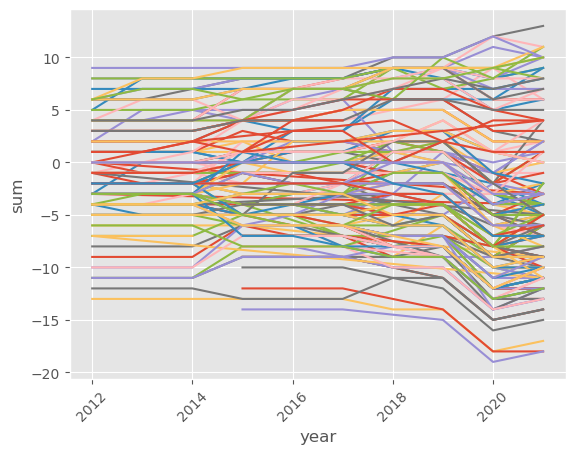

In [48]:
# show all countries development of the sum index over time

iso_l = df['iso3'].unique().tolist()

for country in iso_l:
    # xcol = 'year'
    # ycol = 'sum'

    x = df[df['iso3'] == country]['year']
    y = df[df['iso3'] == country]['sum']
    #xs, ys = zip(*sorted(zip(xs, ys)))

    plt.style.use('ggplot') 
    #plt.figure(figsize=(12, 8))

    plt.plot(x, y)

plt.xticks(rotation=45)
plt.xlabel('year')
plt.ylabel('sum')
    

plt.show()

In [49]:
# checking missing values

years_to_check = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Group the DataFrame by ISO3 and get the unique years for each country
grouped_years = df.groupby('iso3')['year'].unique()

# Identify the countries that don't have certain years
countries_without_years = {country: set(years_to_check) - set(years) for country, years in grouped_years.items()}

# Print the countries that don't have certain years
x = 0

for country, missing_years in countries_without_years.items():
    if missing_years:
        x += 1
        print(f"Country: {country}, Missing years: {missing_years}, Loop {x}")


Country: AFG, Missing years: {2012, 2013, 2014}, Loop 1
Country: AGO, Missing years: {2012, 2013, 2014}, Loop 2
Country: ATG, Missing years: {2012, 2013, 2014}, Loop 3
Country: BDI, Missing years: {2012, 2013, 2014}, Loop 4
Country: BEN, Missing years: {2012, 2013, 2014}, Loop 5
Country: BFA, Missing years: {2012, 2013, 2014, 2015}, Loop 6
Country: BGD, Missing years: {2012, 2013, 2014}, Loop 7
Country: BRN, Missing years: {2012, 2013, 2014}, Loop 8
Country: BTN, Missing years: {2012, 2013, 2014}, Loop 9
Country: BWA, Missing years: {2012, 2013, 2014}, Loop 10
Country: CAF, Missing years: {2012, 2013, 2014}, Loop 11
Country: CIV, Missing years: {2012, 2013, 2014, 2015}, Loop 12
Country: CMR, Missing years: {2012, 2013, 2014}, Loop 13
Country: COD, Missing years: {2012, 2013, 2014}, Loop 14
Country: COG, Missing years: {2012, 2013, 2014}, Loop 15
Country: COM, Missing years: {2012, 2013, 2014}, Loop 16
Country: DJI, Missing years: {2012, 2013, 2014}, Loop 17
Country: DMA, Missing years:

In [50]:
years_to_check = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Group the DataFrame by ISO3 and get the unique years for each country
grouped_years = df.groupby('iso3')['year'].unique()

# Identify the countries that don't have certain years
countries_without_years = {country: set(years_to_check) - set(years) for country, years in grouped_years.items()}

for country, missing_years in countries_without_years.items():
    if len(missing_years) <= 4:
        for miss_year in sorted(list(missing_years), reverse=True):
            befor_t = df.query(f"iso3 == '{country}' and year == {miss_year + 1}")['sum']
            temp_df = pd.DataFrame({'iso3': country, 'year': miss_year, 'sum': befor_t})
            df = pd.concat([df, temp_df], ignore_index=True, axis=0, join='outer')

In [51]:
df = df.sort_values(by=['iso3', 'year'], ascending=[True, True]).reset_index(drop=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   iso3                            1764 non-null   object 
 1   year                            1764 non-null   int64  
 2   antidiscrimination_legislation  1576 non-null   float64
 3   marriage__civil_partnership     1576 non-null   float64
 4   adoption_allowed                1576 non-null   float64
 5   lgbt_marketing                  1576 non-null   float64
 6   equal_age_of_consent            1576 non-null   float64
 7   religious_influence             1576 non-null   float64
 8   hiv_travel_restrictions         1576 non-null   float64
 9   anti-gay_laws                   1576 non-null   float64
 10  homosexuality_illegal           1576 non-null   float64
 11  pride_banned                    1576 non-null   float64
 12  locals_hostile                  15

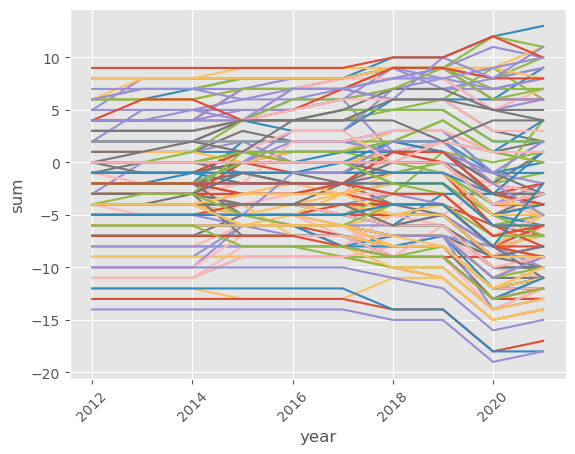

In [53]:
# show all countries development of the sum index over time

iso_l = df['iso3'].unique().tolist()

for country in iso_l:

    x = df[df['iso3'] == country]['year']
    y = df[df['iso3'] == country]['sum']

    plt.style.use('ggplot') 

    plt.plot(x, y)

plt.xticks(rotation=45)
plt.xlabel('year')
plt.ylabel('sum')
    

plt.show()

In [54]:
df['iso3'].nunique()

181

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 10))
df['total'] = scaler.fit_transform(df['sum'].values.reshape(-1, 1))

In [56]:
df[df['iso3'] == 'DEU']

,iso3,year,antidiscrimination_legislation,marriage__civil_partnership,adoption_allowed,lgbt_marketing,equal_age_of_consent,religious_influence,hiv_travel_restrictions,anti-gay_laws,...,pride_banned,locals_hostile,prosecution,murders,death_sentence,trans_gender_rights,intersex__3rd_option,conversion_therapy,sum,total
440,DEU,2012,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7.5000
441,DEU,2013,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7.5000
442,DEU,2014,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,7.5000
443,DEU,2015,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,7.8125
444,DEU,2016,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,7.8125
445,DEU,2017,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,7.8125
446,DEU,2018,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,9,8.7500
447,DEU,2019,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,7,8.1250
448,DEU,2020,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,8,8.4375
449,DEU,2021,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,9,8.7500


In [57]:
# df['total2'] = df[['antidiscrimination_legislation', 'marriage__civil_partnership',
#        'adoption_allowed', 'lgbt_marketing', 'equal_age_of_consent',
#        'religious_influence', 'hiv_travel_restrictions', 'anti-gay_laws',
#        'homosexuality_illegal', 'pride_banned', 'locals_hostile',
#        'prosecution', 'murders', 'death_sentence', 'trans_gender_rights',
#        'intersex__3rd_option', 'conversion_therapy']].sum(axis=1) / len(df.columns)

In [58]:
# checking missing values

years_to_check = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Group the DataFrame by ISO3 and get the unique years for each country
grouped_years = df.groupby('iso3')['year'].unique()

# Identify the countries that don't have certain years
countries_without_years = {country: set(years_to_check) - set(years) for country, years in grouped_years.items()}

# Print the countries that don't have certain years
x = 0

for country, missing_years in countries_without_years.items():
    if missing_years:
        x += 1
        print(f"Country: {country}, Missing years: {missing_years}, Loop {x}")

Country: DZA, Missing years: {2016, 2017, 2018, 2019, 2012, 2013, 2014}, Loop 1
Country: KNA, Missing years: {2016, 2017, 2018, 2019, 2020, 2021, 2015}, Loop 2
Country: LSO, Missing years: {2016, 2017, 2018, 2019, 2012, 2013, 2014, 2015}, Loop 3
Country: MLI, Missing years: {2016, 2017, 2018, 2019, 2012, 2013, 2014, 2015}, Loop 4
Country: NER, Missing years: {2016, 2017, 2018, 2019, 2012, 2013, 2014, 2015}, Loop 5
Country: PRK, Missing years: {2016, 2017, 2018, 2019, 2012, 2013, 2014, 2015}, Loop 6


In [59]:
pd.DataFrame(country193,columns=['iso3'])[~pd.DataFrame(country193,columns=['iso3'])['iso3'].isin(df['iso3'])]

,iso3
69,GIN
88,KIR
108,MHL
112,FSM
121,NRU
132,PLW
145,LCA
146,VCT
149,STP
161,SSD


In [60]:
missing = ['DZA', 'KNA', 'LSO', 'MLI', 'NER', 'PRK', 'GIN', 'KIR', 'MHL', 'FSM', 'NRU', 'PLW', 'LCA', 'VCT', 'STP', 'SSD', 'TLS', 'TUV']


In [61]:
import sql_functions as sf

#Define schema for DBeaver
schema = 'capstone_travel_index'
engine = sf.get_engine()

#Import dataset to DBeaver
table_name = 'lgbtq_score'
if engine!=None:
    try:
        df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The lgbtq_score table was imported successfully.
